In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
alt.renderers.enable('notebook')
import scipy.stats as stat 
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import sklearn
import statsmodels.api as sm
from collections import defaultdict 


In [2]:
data = pd.read_csv('telco.tsv',delimiter="\t")
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
tenure     1000 non-null int64
age        1000 non-null int64
marital    1000 non-null object
address    1000 non-null int64
income     1000 non-null int64
ed         1000 non-null object
employ     1000 non-null int64
retire     1000 non-null object
gender     1000 non-null object
longmon    1000 non-null float64
wiremon    1000 non-null float64
churn      1000 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 74.3+ KB


,tenure,age,marital,address,income,ed,employ,retire,gender,longmon,wiremon,churn
0,13,44,Married,9,64,College degree,5,No,Male,3.70,0.0,Yes
1,11,33,Married,7,136,Post-undergraduate degree,5,No,Male,4.40,35.7,Yes
2,68,52,Married,24,116,Did not complete high school,29,No,Female,18.15,0.0,No
3,33,33,Unmarried,12,33,High school degree,0,No,Female,9.45,0.0,Yes
4,23,30,Married,9,30,Did not complete high school,2,No,Male,6.30,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,39,Unmarried,0,27,Some college,0,No,Female,3.00,0.0,No
996,7,34,Unmarried,2,22,Post-undergraduate degree,5,No,Female,4.65,0.0,No
997,67,59,Unmarried,40,944,Post-undergraduate degree,33,No,Female,26.75,65.8,No
998,70,49,Unmarried,18,87,High school degree,22,No,Female,25.60,0.0,No


 
**1.** Have a closer look at the definitions of the variables and analyze which of them might
require a separate treatment. Consider for example the variable ed. There are two
possibilities how the variable ed can be included into the model (one with dummy
variables, the other one without dummies). Think about these two approaches and
suggest which approach is more appropriate. Motivate your decision.


Comments on how to include data into the model

Dummy variables are useful because they enable us to use a single regression equation to represent multiple groups. 
<br><br>
There are many types of data treatment. Dummy variables allows us to introduce K-1 columns with 0 or 1 value, where K is the number of categories. Another chance is to just code categories with numbers. Second approcah will "fool the regression", as the last category will have more value\weight than the first. This brings the conclusion, that we need to introduce 4 columns of dummy variable (shown in cell below), because we have 5 types of categories. This is done to avoid Dummy-trap, or multicolinearity. It's obvious if the first 4 columns have zero the left one is 1.<br>
Also, our dataset has colums that should be also converted to dummies, those columns are **marital, retire, gender, churn.**<br>
!!!difference between school-college will be same, but if we make it categorical college and scooll will be more distinct

In [3]:
# function that generates K-1 dummies.
def convert_to_dummies(data):
    just_dummies = pd.get_dummies(data,
                                  columns=['marital', 'retire', 'gender', 'churn', 'ed'],
                                  drop_first=True)
    return just_dummies


data = convert_to_dummies(data)
data.head()

,tenure,age,address,income,employ,longmon,wiremon,marital_Unmarried,retire_Yes,gender_Male,churn_Yes,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college
0,13,44,9,64,5,3.70,0.0,0,0,1,1,0,0,0,0
1,11,33,7,136,5,4.40,35.7,0,0,1,1,0,0,1,0
2,68,52,24,116,29,18.15,0.0,0,0,0,0,1,0,0,0
3,33,33,12,33,0,9.45,0.0,1,0,0,1,0,1,0,0
4,23,30,9,30,2,6.30,0.0,0,0,1,0,1,0,0,0


**2** Consider now the dependent variable and the interval (metric) scaled explanatory
variables. Plot these data and decide if you wish to transform these x-variables and if
there is a need to transform the y variable. You can also use some measure of skewness
to decide about y. The variable wiremon shows a very specific pattern. How would
you take it into account?

2.961653118665478

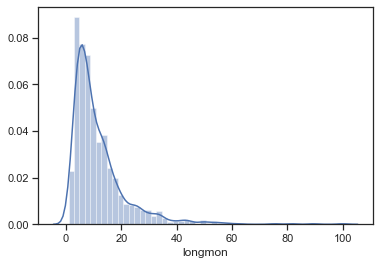

In [4]:
ax = sns.distplot(data.longmon)
skew(data.longmon)

The data is skewed to the right (skewness value > 0, so data is right-skewed) and by taking the log of it we get data that is almost 0-skewed

0.16619428694170782

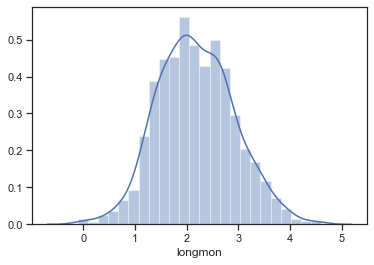

In [5]:
#add log
ax = sns.distplot(np.log(data.longmon))
skew(np.log(data.longmon))

In [6]:
data

,tenure,age,address,income,employ,longmon,wiremon,marital_Unmarried,retire_Yes,gender_Male,churn_Yes,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college
0,13,44,9,64,5,3.70,0.0,0,0,1,1,0,0,0,0
1,11,33,7,136,5,4.40,35.7,0,0,1,1,0,0,1,0
2,68,52,24,116,29,18.15,0.0,0,0,0,0,1,0,0,0
3,33,33,12,33,0,9.45,0.0,1,0,0,1,0,1,0,0
4,23,30,9,30,2,6.30,0.0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,39,0,27,0,3.00,0.0,1,0,0,0,0,0,0,1
996,7,34,2,22,5,4.65,0.0,1,0,0,0,0,0,1,0
997,67,59,40,944,33,26.75,65.8,1,0,0,0,0,0,1,0
998,70,49,18,87,22,25.60,0.0,1,0,0,0,0,1,0,0


In [7]:
#include this in data



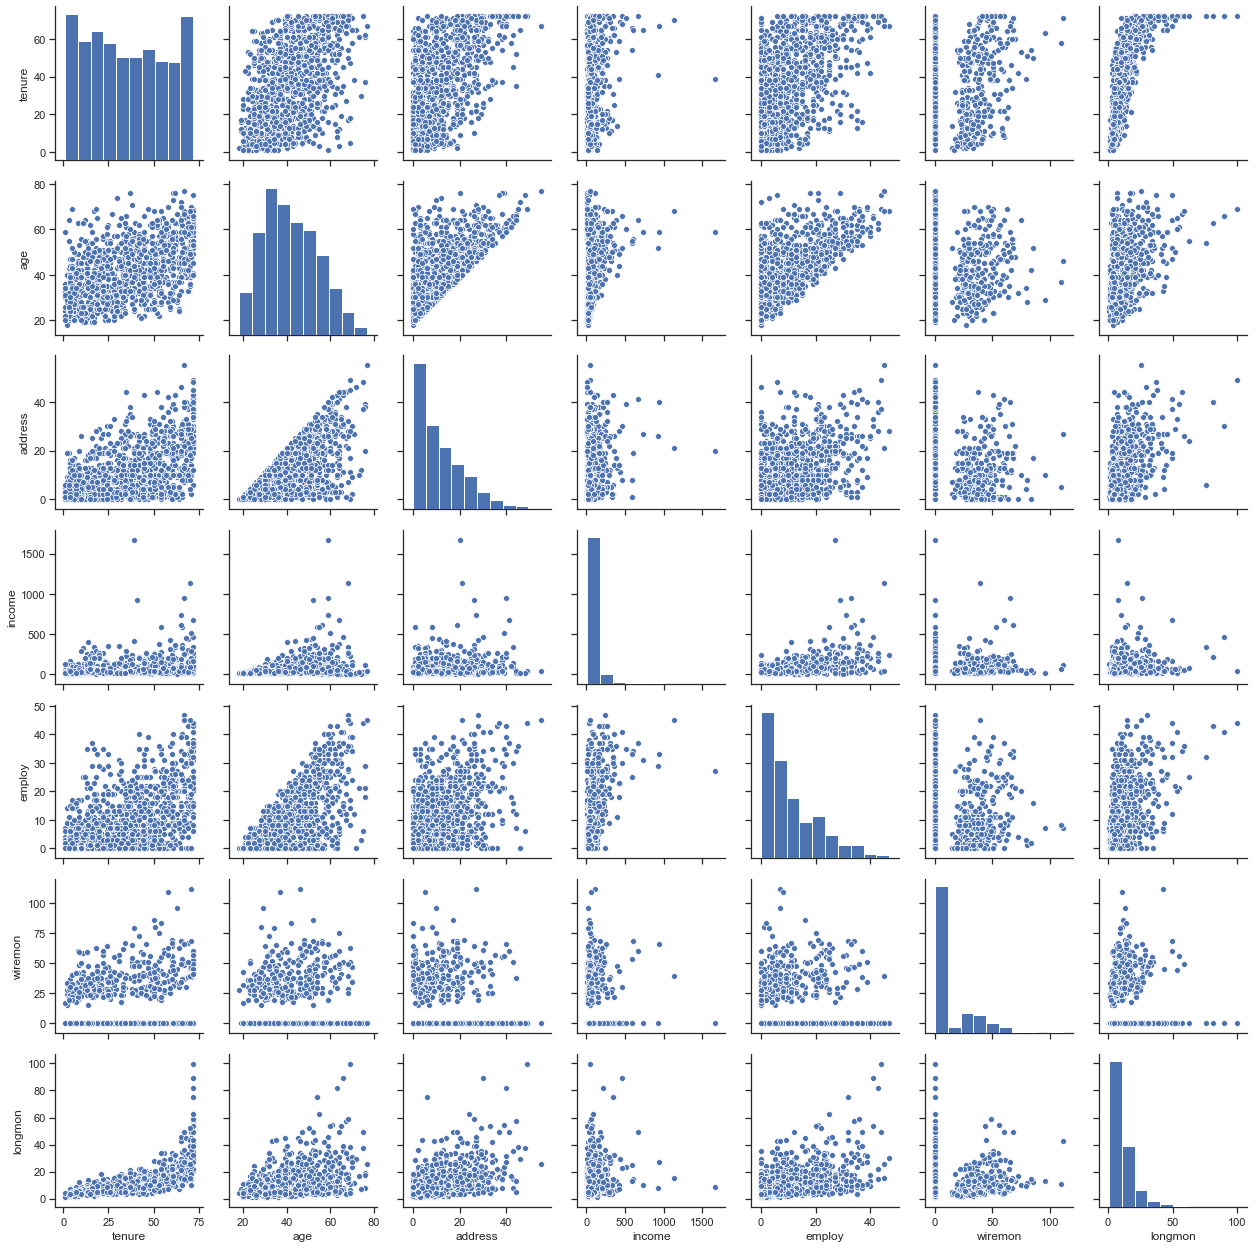

In [8]:
g = sns.pairplot(data,
                 vars=[
                     'tenure', 'age', 'address', 'income', 'employ', 'wiremon',
                     'longmon'
                 ])

In [9]:
# This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D’Agostino and Pearson’s
def check_skewness(X):
    print("skew = {:g}".format(skew(X)))

In [10]:
print('tenure: ')
check_skewness(data.tenure)
print('age: ')
check_skewness(data.age)
print('address: ')
check_skewness(data.address)
print('income: ')
check_skewness(data.income)
print('employ: ')
check_skewness(data.employ)
print('wiremon: ')
check_skewness(data.wiremon)
print('longmon: ')
check_skewness(data.longmon)

tenure: 
skew = 0.111692
age: 
skew = 0.356128
address: 
skew = 1.10459
income: 
skew = 6.6333
employ: 
skew = 1.05946
wiremon: 
skew = 1.60127
longmon: 
skew = 2.96165


so, data need transfromations those values that have skewness not near 0, and wiremon needs transformation to binary as it can be described as people who dont use internet and other, as there are a lot of 0, so it can be changed

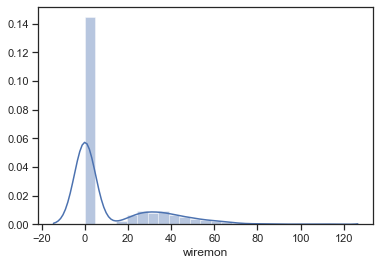

In [11]:
ax = sns.distplot(data.wiremon)

In [12]:
# apply transform and check skewness
print('tenure_log: ')
check_skewness(data.tenure)
print('age: ')
check_skewness(data.age)
print('address_sqrt: ')
check_skewness(np.sqrt(data.address))
print('income_log: ')
check_skewness(np.log(data.income))
print('employ_sqrt: ')
check_skewness(np.sqrt(data.employ))
print('longmon: ')
check_skewness(data.longmon)

tenure_log: 
skew = 0.111692
age: 
skew = 0.356128
address_sqrt: 
skew = 0.0970388
income_log: 
skew = 0.700293
employ_sqrt: 
skew = 0.0216799
longmon: 
skew = 2.96165


In [13]:
#make wiremon binary
data_transformed = data
data_transformed['wiremon_binary'] = data_transformed['wiremon'].apply(lambda x: 1 if x != 0 else 0)
data_transformed = data_transformed.drop('wiremon', axis=1)
data_transformed.address = np.sqrt(data_transformed.address)
data_transformed.income = np.log(data_transformed.income)
data_transformed.employ = np.sqrt(data_transformed.employ)
data_transformed.longmon = np.log(data_transformed.longmon)
data_transformed

,tenure,age,address,income,employ,longmon,marital_Unmarried,retire_Yes,gender_Male,churn_Yes,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,wiremon_binary
0,13,44,3.000000,4.158883,2.236068,1.308333,0,0,1,1,0,0,0,0,0
1,11,33,2.645751,4.912655,2.236068,1.481605,0,0,1,1,0,0,1,0,1
2,68,52,4.898979,4.753590,5.385165,2.898671,0,0,0,0,1,0,0,0,0
3,33,33,3.464102,3.496508,0.000000,2.246015,1,0,0,1,0,1,0,0,0
4,23,30,3.000000,3.401197,1.414214,1.840550,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,39,0.000000,3.295837,0.000000,1.098612,1,0,0,0,0,0,0,1,0
996,7,34,1.414214,3.091042,2.236068,1.536867,1,0,0,0,0,0,1,0,0
997,67,59,6.324555,6.850126,5.744563,3.286534,1,0,0,0,0,0,1,0,1
998,70,49,4.242641,4.465908,4.690416,3.242592,1,0,0,0,0,1,0,0,0


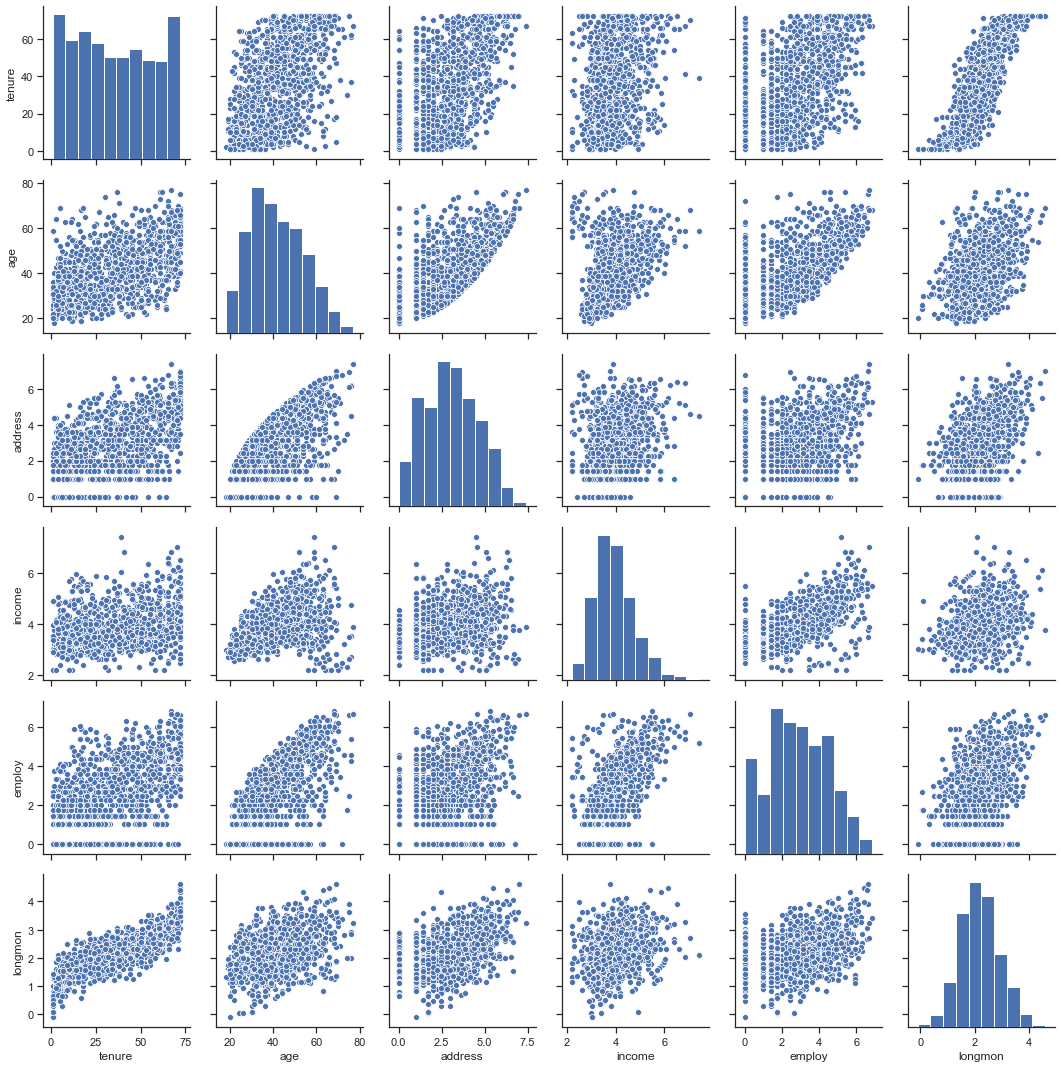

In [14]:
pair = sns.pairplot(data_transformed,
                 vars=[
                     'tenure', 'age', 'address', 'income', 'employ', 'longmon'
                 ])

After visualizing the data I decided to normalize all variables so it is easier 
 to interpret the coefficients of the model as they have same influence on the model

In [15]:
# normalize all variables, so it is easier 
# to interpret the coefficients of the model as they have same influence on the model
min_max_scaler = MinMaxScaler()
data_normed = pd.DataFrame(min_max_scaler.fit_transform(data_transformed))
data_normed.columns = data_transformed.columns
data_normed

,tenure,age,address,income,employ,longmon,marital_Unmarried,retire_Yes,gender_Male,churn_Yes,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,wiremon_binary
0,0.169014,0.440678,0.404520,0.375641,0.326164,0.300145,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.140845,0.254237,0.356753,0.519983,0.326164,0.336933,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.943662,0.576271,0.660578,0.489523,0.785507,0.637794,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.450704,0.254237,0.467099,0.248802,0.000000,0.499227,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.309859,0.203390,0.404520,0.230551,0.206284,0.413142,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.126761,0.355932,0.000000,0.210375,0.000000,0.255619,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
996,0.084507,0.271186,0.190693,0.171159,0.326164,0.348666,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
997,0.929577,0.694915,0.852803,0.890992,0.837931,0.720143,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
998,0.971831,0.525424,0.572078,0.434434,0.684167,0.710813,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**3.** After making up your decision about the above two problems run a simple linear
regression. Pick up one of the regressors. Write down the corresponding hypothesis of
the t-test. Provide the formula for the test statistics, explain the components of the
formula and give the values for this components. Evaluate the goodness of the model.
Explain in your own words the difference between R2 and adjusted R2.

In [16]:
# #this runs regression for all variables
# X = data_normed.drop(['longmon'], axis=1)
# y = data_normed.longmon
# reg = LinearRegression().fit(X, y)
# reg.score(X, y)
# coefficients = reg.coef_
# coefficients


In [17]:
# add constant to fit intercept
data_const = sm.add_constant(data_normed)
X_single = data_const.drop(['longmon'], axis=1)
y_single = data_const.longmon
reg_statsmodel_single = sm.OLS(y_single, X_single).fit()
reg_statsmodel_single.summary()


c:\users\stell\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                longmon   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     178.0
Date:                Tue, 31 Dec 2019   Prob (F-statistic):          5.13e-258
Time:                        16:30:13   Log-Likelihood:                 1070.3
No. Observations:                1000   AIC:                            -2111.
Df Residuals:                     985   BIC:                            -2037.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2820      0.011     25.611      0.000       0.260       0.304
tenure                              0.4160      0.012     35.697      0.000       0.393       0.439
age                                -0.0232      0.021     -1.115      0.265      -0.064       0.018
address                             0.0280      0.017      1.633      0.103      -0.006       0.062
income                              0.0428      0.028      1.549      0.122      -0.011       0.097
employ                             -0.0067      0.019     -0.345      0.730      -0.044       0.031
marital_Unmarried                  -0.0151      0.005     -2.769      0.006      -0.026      -0.004
retire_Yes                          0.0594      0.016      3.652      0.000       0.027       0.091
gender_Male                         0.0073      0.005      1.368      0.172      -0.003       0.018
churn_Yes                          -0.0086      0.007     -1.312      0.190      -0.021       0.004
ed_Did not complete high school    -0.0214      0.009     -2.354      0.019      -0.039      -0.004
ed_High school degree              -0.0033      0.008     -0.426      0.670      -0.019       0.012
ed_Post-undergraduate degree       -0.0241      0.012     -2.056      0.040      -0.047      -0.001
ed_Some college                    -0.0066      0.008     -0.814      0.416      -0.023       0.009
wiremon_binary                     -0.0014      0.006     -0.233      0.816      -0.014       0.011
==============================================================================
Omnibus:                        2.536   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.570
Skew:                          -0.053   Prob(JB):                        0.277
Kurtosis:                       3.225   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**corresponding hypothesis of the t-test** - null hypothesis is that the coefficient of a given predictor variable is 0,so it has no effect on the Y.

pick one of regressors - **address**

In [18]:
# t-test done by hand
# convert the NumPy arrray to matrix
X_single_matrix = np.matrix( X_single )
 
# perform the matrix multiplication,
# and then take the inverse
C = np.linalg.inv( X_single_matrix.T.dot(X_single_matrix ))

# multiply by the MSE of the residual
C *= reg_statsmodel_single.mse_resid
 
# take the square root
SE = np.sqrt(C)
 
i = 3
beta = reg_statsmodel_single.params[i]
se = SE[i,i]
t = beta / se
print ('t =', t)

t = 1.6333941181293519


c:\users\stell\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


Because for this variable P=0.103 that is more than $\alpha=0.05$, so we cannot reject the null hypothesis

**find goodness of the model**

$R^2$ squared here is 0.717

adjusted $R^2$ takes degreees of freedom into account

In [19]:
# predict = reg_statsmodel_single.predict(X)
# #y true - y predicted
# np.mean(sigma_squared)

In [20]:
# XXinv = np.linalg.inv(np.transpose(X).dot(X))

In [21]:
# beta = np.diagonal(np.mean(sigma_squared)*(XXinv))

In [22]:
#for one column find test
# t = (beta[3])/np.sqrt(beta[3])
# #todo: find p
# N = reg_statsmodel_single.nobs
# P = reg_statsmodel_single.df_model
# dof = N - P - 1
# hp = 1.0 - stat.t( dof ).cdf( t )
# p = hp * 2.0
# p

In [23]:
# (beta[4] - 0)/np.sqrt(beta[4])

In [24]:
# # the total sum of squares.
# sigma_squared = (y - reg_statsmodel_single.predict(X))**2

# SST = (y - np.mean(y))**2

In [25]:
# sum(sigma_squared)/sum(SST)

In [26]:
# 1 - sum(sigma_squared)/sum(SST)

In [27]:
# reg_statsmodel_single.score(X_single, y_single)

**4.** Compute manually the predicted values from the above regression and the residuals.
Make two plots: residuals vs. true y's and predicted y's vs. true y's. What do you
expect in both cases and why? Do the obtained figures support your expectations?

expected - for all levels  variance of residuals doesnt change residulas vs predicted and true vs predicted

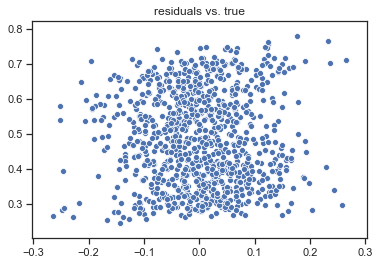

In [28]:
sns.scatterplot(y_single - reg_statsmodel_single.predict(X_single), reg_statsmodel_single.predict(X_single)).set_title("residuals vs. true")
plt.show()

Expected: Residuals are normally distributed around zero and they are eqaully dispersed on the plot

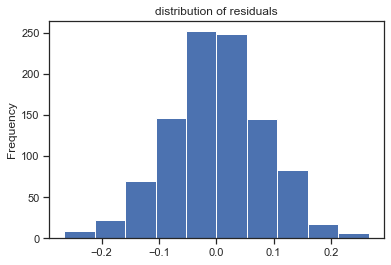

In [29]:
np.mean(y_single - reg_statsmodel_single.predict(X_single))
(y_single - reg_statsmodel_single.predict(X_single)).plot.hist().set_title("distribution of residuals")
plt.show()

they are equally distributed

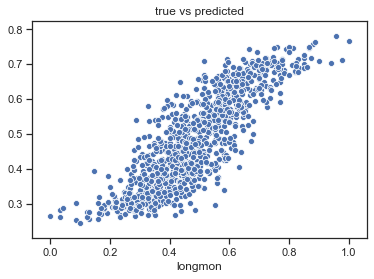

In [30]:
sns.scatterplot(y_single,reg_statsmodel_single.predict(X_single)).set_title("true vs predicted")
plt.show()

Expect them to be linear or almost linear

**5**

In [31]:
reg_statsmodel = sm.OLS(y_single, X_single).fit()
size = len(X_single.columns)
R = np.zeros((4, size))

R[0, 11] = 1
R[1, 12] = 1
R[2, 13] = 1
R[3, 14] = 1

reg_statsmodel.f_test(R)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[1.12993151]]), p=0.3408951404781795, df_denom=985, df_num=4>

In this test P-value shows that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.
p is small m almost zero, so we reject H0, so dummy vars have impact

In [32]:
print("matrix is")
R

matrix is


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

vector is by default (0,0,0,0)

**6.**

**address** may mean how long the pace(customer) was served.  <br>
**ed** may influense the frequency of internet usage or long distance call usage <br>
**retire** may show amount of TV usage during the day as people that already left the job tent to spend a lot of time watching TV

**7** 
Compute the 95% confidence intervals for the parameters of address and income and
provide its economic meaning. Relate the CIs to the tests of significance, i.e. how
would you use these intervals to decide about the significance of the corresponding
explanatory variables? The CIs are computed relying on the assumption, that the
residuals follow normal distribution. Is this assumption fulfilled? Run an appropriate
goodness-of-fit test.

In [33]:
#view summary again
reg_statsmodel_single.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                longmon   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     178.0
Date:                Tue, 31 Dec 2019   Prob (F-statistic):          5.13e-258
Time:                        16:30:14   Log-Likelihood:                 1070.3
No. Observations:                1000   AIC:                            -2111.
Df Residuals:                     985   BIC:                            -2037.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2820      0.011     25.611      0.000       0.260       0.304
tenure                              0.4160      0.012     35.697      0.000       0.393       0.439
age                                -0.0232      0.021     -1.115      0.265      -0.064       0.018
address                             0.0280      0.017      1.633      0.103      -0.006       0.062
income                              0.0428      0.028      1.549      0.122      -0.011       0.097
employ                             -0.0067      0.019     -0.345      0.730      -0.044       0.031
marital_Unmarried                  -0.0151      0.005     -2.769      0.006      -0.026      -0.004
retire_Yes                          0.0594      0.016      3.652      0.000       0.027       0.091
gender_Male                         0.0073      0.005      1.368      0.172      -0.003       0.018
churn_Yes                          -0.0086      0.007     -1.312      0.190      -0.021       0.004
ed_Did not complete high school    -0.0214      0.009     -2.354      0.019      -0.039      -0.004
ed_High school degree              -0.0033      0.008     -0.426      0.670      -0.019       0.012
ed_Post-undergraduate degree       -0.0241      0.012     -2.056      0.040      -0.047      -0.001
ed_Some college                    -0.0066      0.008     -0.814      0.416      -0.023       0.009
wiremon_binary                     -0.0014      0.006     -0.233      0.816      -0.014       0.011
==============================================================================
Omnibus:                        2.536   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.570
Skew:                          -0.053   Prob(JB):                        0.277
Kurtosis:                       3.225   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

95% confidence intervals are given in summary of the OLS (cell above), so for address it is (-0.006	0.062) and for income it is (-0.011	0.097). 

The confidence interval is the the range of values we’d expect to find coeficient of the parameter. A smaller confidence interval suggests that we are confident about the value of the estimated coefficient. A larger confidence interval suggests that there is more uncertainty or variance in parameter

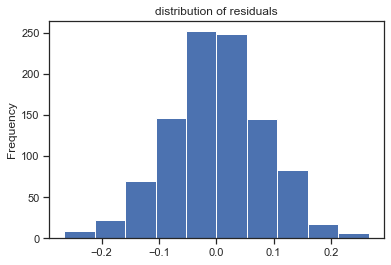

In [34]:
(y_single - reg_statsmodel_single.predict(X_single)).plot.hist().set_title("distribution of residuals")
plt.show()

In [35]:
stat.kstest(y_single - reg_statsmodel_single.predict(X_single),  'norm')

KstestResult(statistic=0.4164444807748714, pvalue=1.4347148361166378e-157)

So, the distribution of residuals is normal around 0

P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than 0.05, it indicates that the variable affects the result, so CI. So, significant variables are *tenure,marital_Unmarried, retire_Yes, ed_Did not complete high school, ed_Post-undergraduate degree*. What is noticeable for them is that their CI does not include zero, but for other - there is 0 in the CI.

**8** 
Many of the variable appear insignicant and we should nd the smallest model, which
still has a good explanatory power. Choose this model using stepwise model selection
(either based on the tests for R2 or using AIC/BIC). Pick up the last step of the
model selection procedure and explain in details how the method/approach works (or
is implemented in your software). Work with this model in all the remaining steps.  

In [36]:
# this is algorithm to stepwize model selction thta uses AIC as a metric of how well model performs
# this method drops a variable if its drop yields to smallest AIC value in the model
# this is done until AIC is smaller than in previous step
# metod returns list of remaining variables
def stepwize_regression_aic(X, y, alpha, verbose=False):
    variables = list(X.columns)
    while True:
        #dictionarry to store variable name and AIC of the model after this variable was dropped
        vars_aics = defaultdict(list)
        # test the AIC of "non dropped" model
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[variables]))).fit()
        prev_aic = model.aic
        if verbose:
            print("before dropping variables{}".format(prev_aic))
        # iterate over remaining variables to store all AICs in dictionary
        for variable in variables:
            buffer_variables = variables.copy()
            buffer_variables.remove(variable)
            vars_aics[variable].append(
                sm.OLS(y, sm.add_constant(pd.DataFrame(
                    X[buffer_variables]))).fit().aic)
            
        #find the value, the drop of which yielded smalles AIC
        key_min = min(vars_aics.keys(), key=(lambda k: vars_aics[k]))
        
        #compare recently retrieved value of AIC with previous value
        if (vars_aics[key_min] < prev_aic):
            if verbose:
                print('Drop {:30} with AIC {} is smaller from {}'.format(key_min, vars_aics[key_min], prev_aic))
            #drop variable
            variables.remove(key_min)
        else:
            if verbose:
                print('No change from{}, to{}'.format(vars_aics[key_min], prev_aic))
            break
    return variables

In [37]:
var = stepwize_regression_aic(X_single, y_single, 0.05, verbose=True)
print("\n\nRemaining variables: {}, amount = {}".format(var, len(var)))

before dropping variables-2110.613769928811
Drop wiremon_binary                 with AIC [-2112.5585020490344] is smaller from -2110.613769928811
before dropping variables-2112.5585020490344
Drop employ                         with AIC [-2114.4368239452424] is smaller from -2112.5585020490344
before dropping variables-2114.4368239452424
Drop ed_High school degree          with AIC [-2116.2024050809496] is smaller from -2114.4368239452424
before dropping variables-2116.2024050809496
Drop ed_Some college                with AIC [-2117.6990299078634] is smaller from -2116.2024050809496
before dropping variables-2117.6990299078634
Drop churn_Yes                      with AIC [-2118.0851816765544] is smaller from -2117.6990299078634
before dropping variables-2118.0851816765544
Drop age                            with AIC [-2118.514545775949] is smaller from -2118.0851816765544
before dropping variables-2118.514545775949
Drop address                        with AIC [-2118.851945956798] is sm

In [38]:
#test the model with remaining variables
data_const = sm.add_constant(data_normed)
y_test = data_const.longmon
X_test = data_const[['const','tenure', 'income', 'marital_Unmarried', 'retire_Yes', 'ed_Did not complete high school', 'ed_Post-undergraduate degree']]
test_ols = sm.OLS(y_test, X_test).fit()
test_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                longmon   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     414.1
Date:                Tue, 31 Dec 2019   Prob (F-statistic):          3.44e-266
Time:                        16:30:15   Log-Likelihood:                 1066.4
No. Observations:                1000   AIC:                            -2119.
Df Residuals:                     993   BIC:                            -2085.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2799      0.008     36.201      0.000       0.265       0.295
tenure                              0.4226      0.010     42.572      0.000       0.403       0.442
income                              0.0302      0.019      1.562      0.119      -0.008       0.068
marital_Unmarried                  -0.0146      0.005     -2.688      0.007      -0.025      -0.004
retire_Yes                          0.0513      0.013      3.841      0.000       0.025       0.078
ed_Did not complete high school    -0.0175      0.007     -2.619      0.009      -0.031      -0.004
ed_Post-undergraduate degree       -0.0209      0.011     -1.943      0.052      -0.042       0.000
==============================================================================
Omnibus:                        2.905   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                3.006
Skew:                          -0.058   Prob(JB):                        0.222
Kurtosis:                       3.243   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**9.** Sometimes data contains outliers which induces bias in the parameter estimates. Check
for outliers using Cook's distance and leverage. Have a closer look at the observation
with the highest leverage (regardless if it is classiffed as an outlier or not). What makes
this observation so outstanding (you may have a look at Box-plots for interval scaled
variables or at the frequencies for binary/ordinal variables?

In [68]:
infl = reg_statsmodel_single.get_influence()
sm_fr = infl.summary_frame()

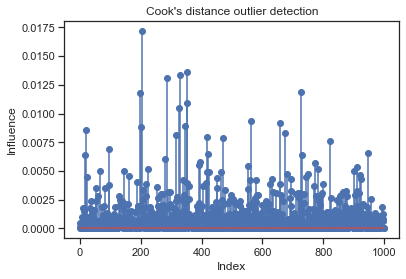

In [51]:
plt.stem(np.arange(len(infl.cooks_distance[0])), infl.cooks_distance[0], use_line_collection=True)
plt.title("Cook's distance outlier detection")
plt.xlabel("Index")
plt.ylabel("Influence")
plt.show()

Next, is Leverage v.s. Studentized residuals plot. It is the studentized residuals indicating if there is any outliers based on the alpha value(significace level).

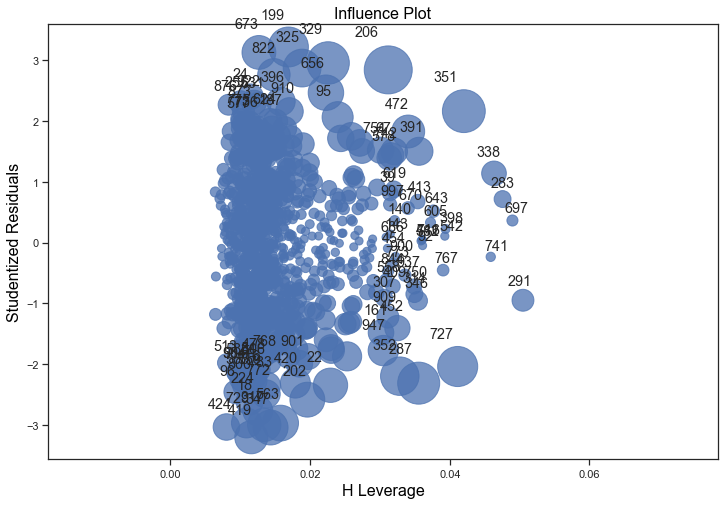

In [52]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(reg_statsmodel_single, alpha  = 0.05, ax = ax, criterion="cooks")



In [79]:
outlierindex = np.argmax(infl.hat_matrix_diag)
data.loc[outlierindex]

tenure                             72.0
age                                63.0
address                            29.0
income                             15.0
employ                             31.0
longmon                            20.6
wiremon                             0.0
marital_Unmarried                   0.0
retire_Yes                          1.0
gender_Male                         1.0
churn_Yes                           0.0
ed_Did not complete high school     0.0
ed_High school degree               0.0
ed_Post-undergraduate degree        1.0
ed_Some college                     0.0
wiremon_binary                      0.0
Name: 291, dtype: float64

In [84]:
print("tenure:")
print(data.tenure.describe())
print("\nage:")
print(data.age.describe())
print("\naddress:")
print(data.address.describe())
print("\nincome:")
print(data.income.describe())
print("\nemploy:")
print(data.employ.describe())
print("\nlongmon:")
print(data.longmon.describe())

tenure:
count    1000.000000
mean       35.526000
std        21.359812
min         1.000000
25%        17.000000
50%        34.000000
75%        54.000000
max        72.000000
Name: tenure, dtype: float64

age:
count    1000.000000
mean       41.684000
std        12.558816
min        18.000000
25%        32.000000
50%        40.000000
75%        51.000000
max        77.000000
Name: age, dtype: float64

address:
count    1000.000000
mean       11.551000
std        10.086681
min         0.000000
25%         3.000000
50%         9.000000
75%        18.000000
max        55.000000
Name: address, dtype: float64

income:
count    1000.000000
mean       77.535000
std       107.044165
min         9.000000
25%        29.000000
50%        47.000000
75%        83.000000
max      1668.000000
Name: income, dtype: float64

employ:
count    1000.000000
mean       10.987000
std        10.082087
min         0.000000
25%         3.000000
50%         8.000000
75%        17.000000
max        47.000000
Name

There are a lot of outliers in this row: tenure, age, address. This might be some customer that has been using the product for a long time. 

**10.** Frequently data is missing. Pick up 5 rows in the data set and delete the value for address. Implement at least two approaches to fill in these values. Write down thecorresponding formulas/model and give motivation for your approach. 
If you use standard routines then check how exactly the data imputation is implemented. How would
you proceed if the value of the binary variable retire is missing? Implementation is
not required.

In [56]:
indexes_to_remove = data_const.sample(5).index

data_const.loc[indexes_to_remove, 'address'] = np.nan
data_const.loc[indexes_to_remove, 'address']

668   NaN
359   NaN
222   NaN
738   NaN
926   NaN
Name: address, dtype: float64

First approach - use mean of all values in the parameter (in DataFrame column) instead of missing values

In [90]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

imp_mean.fit(data_const)
mean_appr = pd.DataFrame(imp_mean.transform(data_const))
mean_appr.columns = data_const.columns
mean_appr.loc[indexes_to_remove, 'address']

668    0.406843
359    0.406843
222    0.406843
738    0.406843
926    0.406843
Name: address, dtype: float64

Second approach - find the most frequent value in column and use it to substitute missing data

In [103]:
#bring nans back
data_const.loc[indexes_to_remove, 'address'] = np.nan
imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_freq.fit(data_const)

max_freq_appr = pd.DataFrame(imp_freq.transform(data_const))
max_freq_appr.columns = data_const.columns
max_freq_appr.loc[indexes_to_remove, 'address']

668    0.13484
359    0.13484
222    0.13484
738    0.13484
926    0.13484
Name: address, dtype: float64

**11** We consider now the model you have worked with so far and the model with original y if
you applied some transformation OR the model with log(y) if you have not transformed
y. Run an appropriate test to decide which of the models is superior. Explain, the
idea of the test and why you cannot make a similar decision using AIC/BIC, etc.

We cant use AIC/BIC, because we want to check the influence of changing the Y variable. To be able to compare models with different Y transformations we need to create

In [111]:
log_statsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                longmon   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     178.0
Date:                Tue, 31 Dec 2019   Prob (F-statistic):          4.35e-258
Time:                        17:25:20   Log-Likelihood:                 1070.5
No. Observations:                1000   AIC:                            -2111.
Df Residuals:                     985   BIC:                            -2037.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2819      0.011     25.632      0.000       0.260       0.304
tenure                              0.4156      0.012     35.654      0.000       0.393       0.439
age                                -0.0237      0.021     -1.143      0.253      -0.064       0.017
address                             0.0293      0.017      1.733      0.083      -0.004       0.062
income                              0.0424      0.028      1.533      0.126      -0.012       0.097
employ                             -0.0062      0.019     -0.322      0.748      -0.044       0.032
marital_Unmarried                  -0.0150      0.005     -2.758      0.006      -0.026      -0.004
retire_Yes                          0.0591      0.016      3.637      0.000       0.027       0.091
gender_Male                         0.0074      0.005      1.382      0.167      -0.003       0.018
churn_Yes                          -0.0087      0.007     -1.326      0.185      -0.022       0.004
ed_Did not complete high school    -0.0216      0.009     -2.374      0.018      -0.039      -0.004
ed_High school degree              -0.0035      0.008     -0.450      0.653      -0.019       0.012
ed_Post-undergraduate degree       -0.0243      0.012     -2.072      0.039      -0.047      -0.001
ed_Some college                    -0.0067      0.008     -0.822      0.411      -0.023       0.009
wiremon_binary                     -0.0013      0.006     -0.208      0.835      -0.013       0.011
==============================================================================
Omnibus:                        2.543   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                2.578
Skew:                          -0.053   Prob(JB):                        0.276
Kurtosis:                       3.225   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
linear_statsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                longmon   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     82.35
Date:                Tue, 31 Dec 2019   Prob (F-statistic):          6.50e-162
Time:                        17:25:23   Log-Likelihood:                -3350.1
No. Observations:                1000   AIC:                             6732.
Df Residuals:                     984   BIC:                             6811.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               3.6188      1.154      3.135      0.002       1.353       5.884
tenure                              0.2936      0.014     20.883      0.000       0.266       0.321
age                                -0.1237      0.029     -4.216      0.000      -0.181      -0.066
address                             0.1403      0.031      4.572      0.000       0.080       0.201
income                             -0.0002      0.003     -0.093      0.926      -0.005       0.005
employ                              0.1650      0.036      4.636      0.000       0.095       0.235
wiremon                             0.0085      0.027      0.309      0.757      -0.045       0.062
marital_Unmarried                  -1.0527      0.452     -2.328      0.020      -1.940      -0.165
retire_Yes                          7.6754      1.213      6.329      0.000       5.295      10.055
gender_Male                         0.4208      0.444      0.948      0.343      -0.450       1.292
churn_Yes                           0.2147      0.546      0.394      0.694      -0.856       1.285
ed_Did not complete high school    -1.5806      0.736     -2.147      0.032      -3.025      -0.136
ed_High school degree              -0.1962      0.642     -0.306      0.760      -1.455       1.063
ed_Post-undergraduate degree       -1.2571      0.974     -1.291      0.197      -3.168       0.654
ed_Some college                    -0.6579      0.673     -0.978      0.328      -1.979       0.663
wiremon_binary                     -0.5959      1.170     -0.509      0.611      -2.892       1.700
==============================================================================
Omnibus:                      709.205   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17564.690
Skew:                           2.920   Prob(JB):                         0.00
Kurtosis:                      22.684   Cond. No.                         888.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
previous = data_dummy = pd.get_dummies(data, drop_first=True).copy()
X = max_freq_appr.drop('longmon', axis=1).copy()
X = sm.add_constant(X)

original_X = sm.add_constant(previous.drop('longmon', axis=1))

# this will be used as feature in next 
log_statsmodel = sm.OLS(max_freq_appr.longmon, X).fit()
linear_statsmodel = sm.OLS(previous.longmon, original_X).fit()
linear_pred = linear_statsmodel.predict(original_X)
log_pred = log_statsmodel.predict(X)
new_feature_linear = np.log(linear_pred) - log_pred
new_feature_log = linear_pred - np.exp(log_pred)
feature_X_log = max_freq_appr.drop('longmon', axis=1).copy() 
feature_X_log['log_feature'] = new_feature_log

feature_X_log['log_feature'] = feature_X_log['log_feature'].apply(lambda x: 0 if x == np.nan else x)


X_final = feature_X_log
X_final = sm.add_constant(X_final)
final_statsmodel_log = sm.OLS(max_freq_appr.longmon, X_final).fit()
final_statsmodel_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                longmon   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     167.0
Date:                Tue, 31 Dec 2019   Prob (F-statistic):          7.45e-258
Time:                        17:43:40   Log-Likelihood:                 1072.6
No. Observations:                1000   AIC:                            -2113.
Df Residuals:                     984   BIC:                            -2035.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2965      0.013     22.660      0.000       0.271       0.322
tenure                              0.2539      0.080      3.174      0.002       0.097       0.411
age                                 0.0257      0.032      0.809      0.419      -0.037       0.088
address                            -0.0149      0.027     -0.542      0.588      -0.069       0.039
income                              0.0297      0.028      1.051      0.293      -0.026       0.085
employ                             -0.0459      0.027     -1.678      0.094      -0.100       0.008
marital_Unmarried                  -0.0070      0.007     -1.056      0.291      -0.020       0.006
retire_Yes                         -0.0089      0.037     -0.241      0.810      -0.082       0.064
gender_Male                         0.0051      0.005      0.929      0.353      -0.006       0.016
churn_Yes                          -0.0105      0.007     -1.589      0.112      -0.023       0.002
ed_Did not complete high school    -0.0112      0.010     -1.081      0.280      -0.032       0.009
ed_High school degree              -0.0025      0.008     -0.323      0.747      -0.018       0.013
ed_Post-undergraduate degree       -0.0131      0.013     -1.014      0.311      -0.038       0.012
ed_Some college                    -0.0016      0.008     -0.193      0.847      -0.018       0.015
wiremon_binary                      0.0010      0.006      0.152      0.879      -0.011       0.013
log_feature                         0.0078      0.004      2.043      0.041       0.000       0.015
==============================================================================
Omnibus:                        1.973   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.373   Jarque-Bera (JB):                1.888
Skew:                          -0.058   Prob(JB):                        0.389
Kurtosis:                       3.179   Cond. No.                         460.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
feature_X_linear = previous.drop('longmon', axis=1).copy() 
feature_X_linear['log_feature'] = new_feature_linear

feature_X_linear.loc[feature_X_linear.log_feature.isnull(), 'log_feature'] = 0

X_final = feature_X_linear
X_final = sm.add_constant(X_final)
final_statsmodel_log = sm.OLS(previous.longmon, X_final).fit()
final_statsmodel_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                longmon   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     86.39
Date:                Tue, 31 Dec 2019   Prob (F-statistic):          1.28e-174
Time:                        17:43:43   Log-Likelihood:                -3317.7
No. Observations:                1000   AIC:                             6669.
Df Residuals:                     983   BIC:                             6753.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               6.9876      1.193      5.858      0.000       4.647       9.329
tenure                              0.3999      0.019     21.156      0.000       0.363       0.437
age                                -0.1624      0.029     -5.636      0.000      -0.219      -0.106
address                             0.1770      0.030      5.887      0.000       0.118       0.236
income                             -0.0007      0.003     -0.273      0.785      -0.006       0.004
employ                              0.2106      0.035      6.030      0.000       0.142       0.279
wiremon                             0.0139      0.027      0.525      0.600      -0.038       0.066
marital_Unmarried                  -1.7333      0.446     -3.887      0.000      -2.609      -0.858
retire_Yes                          8.9132      1.185      7.524      0.000       6.589      11.238
gender_Male                         0.6682      0.431      1.551      0.121      -0.177       1.514
churn_Yes                           0.0149      0.529      0.028      0.978      -1.023       1.053
ed_Did not complete high school    -2.2835      0.718     -3.179      0.002      -3.693      -0.874
ed_High school degree              -0.3048      0.622     -0.490      0.624      -1.525       0.915
ed_Post-undergraduate degree       -1.9016      0.947     -2.009      0.045      -3.759      -0.044
ed_Some college                    -1.0329      0.654     -1.581      0.114      -2.315       0.250
wiremon_binary                     -0.8406      1.134     -0.741      0.459      -3.066       1.385
log_feature                        -3.5697      0.440     -8.108      0.000      -4.434      -2.706
==============================================================================
Omnibus:                      681.115   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16551.632
Skew:                           2.755   Prob(JB):                         0.00
Kurtosis:                      22.154   Cond. No.                         937.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From model summary we can see that p value for the log_feature is < 0.05. This can show that model with log transformation of Y is better

**12** We compare the predictive ability of the estimated regression. Consider the model you worked so far and the original model with the same y but without transformation and selection of features. Compare the two models using leave-one-out CV and 5-fold CV. Explain the idea of this technique with formulas and draw a conclusion about the predictive ability of the models

In [98]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import cross_val_score
#utility function to make statsmodel work with sklearn
class SMWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    def __init__(self, model_class, fit_intercept=True):
        self.model_class = model_class
        self.fit_intercept = fit_intercept
    def fit(self, X, y):
        if self.fit_intercept:
            X = sm.add_constant(X)
        self.model_ = self.model_class(y, X)
        self.results_ = self.model_.fit()
    def predict(self, X):
        if self.fit_intercept:
            X = sm.add_constant(X)
        return self.results_.predict(X)

In [124]:
X = max_freq_appr.drop('longmon', axis=1).copy()
X = sm.add_constant(X)

print(cross_val_score(SMWrapper(sm.OLS), X.drop('income', axis=1), max_freq_appr.longmon, scoring='r2'))
print(cross_val_score(SMWrapper(sm.OLS), data_dummy.drop('longmon', axis=1), data_dummy.longmon, scoring='r2'))

[0.71948023 0.67820678 0.73645043]
[0.48821002 0.53561939 0.58207534]


c:\users\stell\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
c:\users\stell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\stell\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
c:\users\stell\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp in

**5** Consider a linear regression model
for a dependent variable yt that has a sample mean of 17.21. Suppose that we create a new
variable y*
t = yt+10 and run the same linear regression using y*
t instead of yt as a regressand.

1. How are R2 and the estimate of the constant term related in the two regressions? What
if we use yt = yt - 10 instead?

the estimate of the constant term will be 10 units(those that are used as unit in regression) higher for the y*

Because $y*$ has different mean than $y$ it's important to check how mean is changed. When adding a constant to a distribution, the mean will change by the same amount as the constant.
The formula for $R^2$ <br><br>
$R^2 = 1 - \frac{RSS}{TSS}$<br><br>
$TSS = \sum_{i=1}^{N} (y_i - \bar{y})^2$ <br><br>
$RSS = \sum_{i=1}^{N} (y_i - \hat{y})^2$ <br><br>, where N is a sample size<br>
Consider TSS for y*<br><br>
$TSS^* = \sum_{i=1}^{N} (y_i + 10 - (\bar{y} + 10))^2 = \sum_{i=1}^{N} (y_i - \bar{y})^2 = TSS$<br>
In RSS $\bar{y}$ is a function of explanatory variables, so they are not affected by change of mean in  y*, so this one stays the same and $R^2$ doesn't change. <br>
Obviously, if we subtract 10 from $y$ nothing will change

In [40]:
#this is experimental proof of how mean changes with adding a constant to distribution 
n = 1000
np.random.seed(1)
r = np.random.randn(n)
a = np.mean(r)
b=np.mean(a+10)
print(a+10)
print(b)

1-40/(99+100)

10.038812476159602
10.038812476159602


0.7989949748743719

2. What if we do the same with one or all of the regressors?

$RSS = \sum_{i=1}^{N} (y_i - \hat{y})^2 = \sum_{i=1}^{N} (y_i - f(x_i)) = \sum_{i=1}^{N} (y_i -(\alpha + \beta x_i))^2$
Here $\alpha$ is the estimated value of the constant term (intercept) and $\beta$ - estimated slope, so if we change Xs by adding 10 the resulting formula will look like this<br><br>
$RSS = \sum_{i=1}^{N} (y_i -(\alpha + \beta (x_i+10)))^2 = \sum_{i=1}^{N} (y_i -(\alpha+10\beta + \beta(x_i)))^2$<br><br>
The estimate of the slope is not affected by addition of a constant <br>
The estimate of the intercept depends on what constants that have been added

3. Consider a demeaned regression, i.e. center the regressors and the regressand to have
zero mean. How does it in
uence the estimates?

I will use formulas that I've already written in 5.1. Let's consider TSS for zero mean (zero centered) <br><br>
$TSS^* = \sum_{i=1}^{N} (y_i + 10)^2$<br><br>
If we open the brackets we get:<br><br>
$TSS^* = \sum_{i=1}^{N} (y_i + 10)^2 = \sum_{i=1}^{N} y_i^2 + 20\sum_{i=1}^{N} y_i + 100N$ <br><br>
I will take a step back and write down a formula for the sample mean <br><br>
$\bar{X} = \frac{\sum_{i=1}^{N} y_i}{N}$ , <br>
$\sum_{i=1}^{N} y_i = \bar{X} N$<br><br>
So this means that we can sustitute $\sum_{i=1}^{N} y_i$ with $17.21\times N$<br><br>
The formula now looks like this: <br><br>
$\sum_{i=1}^{N} y_i^2 + 20 \times 17.21 \times N + 100\times N =\sum_{i=1}^{N} y_i^2 + 444.2 \times N$ As TSS is located in denominator and $R^2$ between 0 and 1, $R^2$ increases.
As for the yt = yt - 10 the resulting formula will be:
$\sum_{i=1}^{N} y_i^2 - 20 \times 17.21 \times N + 100\times N$ and it will result in $\sum_{i=1}^{N} y_i^2 - 244.2\times N $, and for this variant the $R^2$ will decrease(compared to the original $R^2$)